# SLO Twitter Data Analysis:

### Written By: Professor Keith VanderLinden and Joseph Jinn

<span style="font-family:Papyrus; font-size:1.25em;">
    
</p>This Jupyter Notebook provides an analysis of Twitter data obtained by CSIRO over the course of the past decade.  The analysis is in part based on and adapted from "SLO analysis.ipynb" by Shuntaro Yada from CSIRO.</p><br><br>

</p>The original "SLO analysis.ipynb" utilizes multiple JSON files that are already auto-encoded to be associated with certain mining companies like "adani", "bhp", etc.  We do not have access to those JSON files, so we are currently using the "dataset_slo_20100101-20180510.json" raw Tweet file and the "dataset_20100101-20180510.csv" preprocessed Tweet file from the "sloclassifiers" directory on Calvin College's Borg supercomputer.</p></br>

</span>

## Sample from raw JSON Twitter Dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

This is a sample from our raw JSON Twitter dataset as extracted via the Twitter API.  The dataset was obtained from CSIRO.<br>

The raw Tweet in JSON format is in Dictionary format as key/value pairs.<br>
The value could be a string, integer, float, or another data structure such as a List or Dictionary.<br>

Each line within the JSON file corresponds to a single Tweet.<br>

There are 4 primary objects within the Tweet JSON file.  They are the "Tweet", "User", "Entities", and "Geo" objects.  Sometimes there can also be an extended entities object.<br>

Sample obtained by copy/pasting a single line from the raw JSON file and then manually separating that single line into the individual data fields.<br>

Explanation of each field is taken from the official Twitter API Documentation.<br>

</span>

### Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

The main Tweet object.  The table below gives a sample of the raw Twitter data with the attribute name, attribute value, and a description of the attribute's purpose.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">attribute</th>
    <th class="tg-xldj">value</th>
    <th class="tg-0pky">description</th>
  </tr>
  <tr>
    <td class="tg-xldj">{"in_reply_to_status_id_str":</td>
    <td class="tg-xldj">"305159434462691328"</td>
    <td class="tg-0pky">If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s ID.<br></td>
  </tr>
  <tr>
    <td class="tg-0pky">"in_reply_to_status_id":</td>
    <td class="tg-0pky">305159434462691328</td>
    <td class="tg-0pky">If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"coordinates":</td>
    <td class="tg-0pky">null</td>
    <td class="tg-0pky">Represents the geographic location of this Tweet as reported by the user or client application.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"created_at":</td>
    <td class="tg-0pky">"Sat Feb 23 03:40:21 +0000 2013"</td>
    <td class="tg-0pky">UTC time when this Tweet was created.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"truncated":</td>
    <td class="tg-0pky">false</td>
    <td class="tg-0pky">Indicates whether the value of the text parameter was truncated.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"in_reply_to_user_id_str":</td>
    <td class="tg-0pky">"2768501"</td>
    <td class="tg-0pky">If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s author ID.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"source":</td>
    <td class="tg-0pky">"&lt;a href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"&gt;Twitter for iPhone&lt;\/a&gt;"</td>
    <td class="tg-0pky">Utility used to post the Tweet, as an HTML-formatted string.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"retweet_count":</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">Number of times this Tweet has been retweeted.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"retweeted":</td>
    <td class="tg-0pky">false</td>
    <td class="tg-0pky">Indicates whether this Tweet has been Retweeted by the authenticating user.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"geo":</td>
    <td class="tg-0pky">null</td>
    <td class="tg-0pky">This deprecated attribute has its coordinates formatted as [lat, long], while all other Tweet geo is formatted as [long, lat].</td>
  </tr>
  <tr>
    <td class="tg-0pky">"in_reply_to_screen_name":</td>
    <td class="tg-0pky">"abcnews"</td>
    <td class="tg-0pky">If the represented Tweet is a reply, this field will contain the screen name of the original Tweet’s author.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"is_quote_status":</td>
    <td class="tg-0pky">false</td>
    <td class="tg-0pky">Indicates whether this is a Quoted Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"full_text":</td>
    <td class="tg-0pky">"@abcnews About bloody time. Adani only wants FIFO Indian workers for his Bowen basin mines."</td>
    <td class="tg-0pky">The "extended_tweet" object provides the "full_text" field that contains the complete, untruncated Tweet message when longer than 140 characters.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"id_str":</td>
    <td class="tg-0pky">"305160140833816576"</td>
    <td class="tg-0pky">The string representation of the unique identifier for this Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"in_reply_to_user_id":</td>
    <td class="tg-0pky">2768501</td>
    <td class="tg-0pky">If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"display_text_range":</td>
    <td class="tg-0pky">[0,91]</td>
    <td class="tg-0pky">Part of the extended Tweet object.  Contain the # of characters in the Tweet?</td>
  </tr>
  <tr>
    <td class="tg-0pky">"favorite_count":</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">Indicates approximately how many times this Tweet has been liked by Twitter users.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"id":</td>
    <td class="tg-0pky">305160140833816576</td>
    <td class="tg-0pky">The integer representation of the unique identifier for this Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"place":</td>
    <td class="tg-0pky">null</td>
    <td class="tg-0pky">When present, indicates that the tweet is associated (but not necessarily originating from) a Place.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"contributors":</td>
    <td class="tg-0pky">null</td>
    <td class="tg-0pky">Can't find this field in the documentation.  Deprecated?</td>
  </tr>
  <tr>
    <td class="tg-0pky">"lang":</td>
    <td class="tg-0pky">"en"</td>
    <td class="tg-0pky">When present, indicates a BCP 47 language identifier corresponding to the machine-detected language of the Tweet text, or und if no language could be detected.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"favorited":</td>
    <td class="tg-0pky">false}</td>
    <td class="tg-0pky">Indicates whether this Tweet has been liked by the authenticating user.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"entities":{</td>
    <td class="tg-0pky">"urls":[],"hashtags":[],"user_mentions":[{"indices":[0,8],"screen_name":"abcnews","id_str":"2768501","name":"ABC News","id":2768501}],"symbols":[]}</td>
    <td class="tg-0pky">Entities which have been parsed out of the text of the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0pky">"extended_entities":null</td>
    <td class="tg-0pky">null</td>
    <td class="tg-0pky">If a Tweet contains native media (shared with the Tweet user-interface as opposed via a link to elsewhere), there will also be a extended_entities section.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"user":{</td>
    <td class="tg-0lax">Note: values not included due to sheer amount stretching table width.</td>
    <td class="tg-0lax">User object contains Twitter User account metadata that describes the Twitter User referenced.</td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

Not all fields have a value.  Some are null.  The "entities", "extended_entities", and "user" objects possess values that are themselves nested data structures.<br>

</span>

### Entities Object within the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

This is the "entities" nested data structure within the main Tweet object that contains a dictionary of further nested data structures and key-value pairs.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s268{text-align:left}
</style>
<table class="tg">
  <tr>
    <th class="tg-s268">attribute</th>
    <th class="tg-s268">value</th>
    <th class="tg-s268">description</th>
  </tr>
  <tr>
    <td class="tg-s268">"urls":</td>
    <td class="tg-s268">[]</td>
    <td class="tg-s268">Represents URLs included in the text of a Tweet.</td>
  </tr>
  <tr>
    <td class="tg-s268">"hashtags":</td>
    <td class="tg-s268">[]</td>
    <td class="tg-s268">Represents hashtags which have been parsed out of the Tweet text.</td>
  </tr>
  <tr>
    <td class="tg-s268">"user_mentions":</td>
    <td class="tg-s268">[{"indices":[0,8],"screen_name":"abcnews","id_str":"2768501", "name":"ABC News","id":2768501}]</td>
    <td class="tg-s268">Represents other Twitter users mentioned in the text of the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-s268">"symbols":</td>
    <td class="tg-s268">[]}</td>
    <td class="tg-s268">Represents symbols, i.e. $cashtags, included in the text of the Tweet.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

Not all fields have a value.  Some are null.  Each of these is a List.  The "user_mentions" in this sample contains a dictionary of key-value pairs within the List structure.<br>

The "extended_entities" data structure can contain quite the number of nested data structures and key-value pairs.  Refer to the official Twitter API Documentation for further details.  It shares similar fields as the "entities" object and then even more fields unique to it.<br>

</span>

### User Object within the Main Tweet Object:

<span style="font-family:Papyrus; font-size:1.25em;">

This is the "user" nested data structure within the main Tweet object that contains a dictionary of further nested data structures and key-value pairs.<br>

</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-xldj{border-color:inherit;text-align:left}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-xldj">attribute</th>
    <th class="tg-xldj">value</th>
    <th class="tg-xldj">description</th>
  </tr>
  <tr>
    <td class="tg-xldj">"utc_offset":</td>
    <td class="tg-xldj">36000</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"friends_count":</td>
    <td class="tg-xldj">1385</td>
    <td class="tg-xldj">The number of users this account is following (AKA their “followings”).</td>
  </tr>
  <tr>
    <td class="tg-xldj">"profile_image_url_https":</td>
    <td class="tg-xldj">"https://pbs.twimg.com/profile_images/698290934618787840/SIpBKnWE_normal.jpg"</td>
    <td class="tg-xldj">A HTTPS-based URL pointing to the user’s profile image.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"listed_count":</td>
    <td class="tg-xldj">3</td>
    <td class="tg-xldj">The number of public lists that this user is a member of.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"profile_background_image_url":</td>
    <td class="tg-xldj">"http://abs.twimg.com/images/themes/theme1/bg.png"</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"default_profile_image":</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">When true, indicates that the user has not uploaded their own profile image and a default image is used instead.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"favourites_count":</td>
    <td class="tg-xldj">533</td>
    <td class="tg-xldj">The number of Tweets this user has liked in the account’s lifetime.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"description":</td>
    <td class="tg-xldj">"Train Driver extraordinaire, proud Union Leftie and Labor supporter. Cant stand the LNP and their regressive ideas. Mainly political but I do enjoy a laugh."</td>
    <td class="tg-xldj">The user-defined UTF-8 string describing their account.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"created_at":</td>
    <td class="tg-xldj">"Tue Aug 21 23:23:52 +0000 2012"</td>
    <td class="tg-xldj">The UTC datetime that the user account was created on Twitter.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"is_translator":</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"profile_background_image_url_https":</td>
    <td class="tg-xldj">"https://abs.twimg.com/images/themes/theme1/bg.png"</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"protected":</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">When true, indicates that this user has chosen to protect their Tweets.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"screen_name":</td>
    <td class="tg-xldj">"DazzDicko"</td>
    <td class="tg-xldj">The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"id_str":</td>
    <td class="tg-xldj">"772466924"</td>
    <td class="tg-xldj">The string representation of the unique identifier for this User.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"profile_link_color":</td>
    <td class="tg-xldj">"1DA1F2"</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"is_translation_enabled":</td>
    <td class="tg-xldj">false</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"translator_type":</td>
    <td class="tg-xldj">"none"</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"id":</td>
    <td class="tg-xldj">772466924</td>
    <td class="tg-xldj">The integer representation of the unique identifier for this User.</td>
  </tr>
  <tr>
    <td class="tg-xldj">"geo_enabled":</td>
    <td class="tg-xldj">true</td>
    <td class="tg-xldj">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_background_color":</td>
    <td class="tg-0lax">"C0DEED"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"lang":</td>
    <td class="tg-0lax">"en"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"has_extended_profile":</td>
    <td class="tg-0lax">false</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_sidebar_border_color":</td>
    <td class="tg-0lax">"C0DEED"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_text_color":</td>
    <td class="tg-0lax">"333333"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"verified":</td>
    <td class="tg-0lax">false</td>
    <td class="tg-0lax">When true, indicates that the user has a verified account.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_image_url":</td>
    <td class="tg-0lax">"http://pbs.twimg.com/profile_images/698290934618787840/SIpBKnWE_normal.jpg"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"time_zone":</td>
    <td class="tg-0lax">"Australia/Brisbane"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"url":</td>
    <td class="tg-0lax">null</td>
    <td class="tg-0lax">A URL provided by the user in association with their profile.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"contributors_enabled":</td>
    <td class="tg-0lax">false</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_background_tile":</td>
    <td class="tg-0lax">false</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"entities":</td>
    <td class="tg-0lax">{"description":{"urls":[]}}</td>
    <td class="tg-0lax">Entities which have been parsed out of the text of the Tweet.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"statuses_count":</td>
    <td class="tg-0lax">5176</td>
    <td class="tg-0lax">The number of Tweets (including retweets) issued by the user.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"follow_request_sent":</td>
    <td class="tg-0lax">false</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"followers_count":</td>
    <td class="tg-0lax">945</td>
    <td class="tg-0lax">The number of followers this account currently has.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_use_background_image":</td>
    <td class="tg-0lax">true</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"default_profile":</td>
    <td class="tg-0lax">true</td>
    <td class="tg-0lax">When true, indicates that the user has not altered the theme or background of their user profile.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"following":</td>
    <td class="tg-0lax">false</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"name":</td>
    <td class="tg-0lax">"Daryl Dickson"</td>
    <td class="tg-0lax">The name of the user, as they’ve defined it. Not necessarily a person’s name. Typically capped at 50 characters, but subject to change.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"location":</td>
    <td class="tg-0lax">"Far North Queensland"</td>
    <td class="tg-0lax">The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"profile_sidebar_fill_color":</td>
    <td class="tg-0lax">"DDEEF6"</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
  <tr>
    <td class="tg-0lax">"notifications":</td>
    <td class="tg-0lax">false}</td>
    <td class="tg-0lax">Deprecated.</td>
  </tr>
</table>

<span style="font-family:Papyrus; font-size:1.25em;">

Quite a few fields in the "user" object are deprecated.  The Twitter API Documentation does not say why in particular.  This is understandable as we are using a older dataset with Tweets going back to 2012.  The "user" object also possesses an "entities" object, though in this sample it is empty.<br>

</span>

# Data Analysis Codebase:

<span style="font-family:Papyrus; font-size:1.25em;">
    
The following sections present our current codebase that analyzes various combinations of attributes present in the raw JSON Twitter data file.<br>

</span>

## Generalized Data Analysis Utility Functions:

<span style="font-family:Papyrus; font-size:1.25em;">
    
This function allows us to extract individual attributes from the entire raw JSON Tweet data file and export it to a separate CSV or JSON file.  This allows us to analyze certain attributes across the entire raw dataset despite the fact that we cannot read it into memory in its entirety due to RAM limitations.  Extracting individual attributes reduces filesize signifantly, allowing our 32 GBS of system RAM to suffice for data analysis.<br>

</span>

In [32]:
def generalized_field_extraction_function(input_file_path, output_file_path, field_to_extract, file_type):
    """
    This is a generalized function to extract a single field from the raw JSON Tweet file.
    The data is read in by chunks to ensure they can fit in RAM.

    :param file_type: type of file to save as. ("json" or "csv")
    :param input_file_path: absolute file path of the input file to extract the field from.
    :param output_file_path: absolute file path of the output file to save the extracted field to.
    :param field_to_extract: string name of the field to extract.
    :return: None.
    """
    start_time = time.time()

    # Define size of chunks to read in.
    chunksize = 100000

    # Read in the JSON file.
    twitter_data = pd.read_json(f"{input_file_path}",
                                orient='records',
                                lines=True,
                                chunksize=chunksize)

    # Create empty Pandas Dataframes.
    json_dataframe = pd.DataFrame()
    created_at_dataframe = pd.DataFrame()
    selected_field = pd.DataFrame()

    # Append each chunk of extracted fields to the dataframe.
    chunk_number = 0
    for data in twitter_data:
        json_dataframe = json_dataframe.append(data, ignore_index=True)
        selected_field[field_to_extract] = json_dataframe[field_to_extract]
        created_at_dataframe = created_at_dataframe.append(selected_field)

        # Clear dataframe and increment counter.
        json_dataframe = pd.DataFrame()
        chunk_number += 1

    file_path = \
        f"{output_file_path}{field_to_extract}-attribute.{file_type}"

    if file_type == "csv":
        # Export to CSV file.
        created_at_dataframe.to_csv(file_path, sep=',',
                                    encoding='utf-8', index=False, header=True)
    elif file_type == "json":
        # Export JSON file.
        created_at_dataframe.to_json(file_path, orient='records', lines=True)
    else:
        print(f"Invalid file type entered - aborting operation")
        return

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0

    log.info(f"The time taken to extract the field \"{field_to_extract}\" from the JSON file is {time_elapsed} minutes")
    log.info(f"The number of chunks is {chunk_number} based on chunk size of {chunksize} ")
    log.info('\n')

<span style="font-family:Papyrus; font-size:1.25em;">

Below is a sample function call.  We used this to extract the "created_at" attribute field from the entire raw JSON file in order to perform our time series analysis.<br>

</span>

In [34]:
# Extract the "created_at" field from raw JSON file and export to CSV file.
# generalized_field_extraction_function(
#     "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
#     "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/",
#     "user", "csv")

<span style="font-family:Papyrus; font-size:1.25em;">

This function allows us to read in chunks of data of size "chunksize" as specified and export each data chunk out to a individual CSV or JSON file.  This allows us to load in an entire subset of the JSON Twitter dataset all at once into system RAM and perform data analysis on that subset.<br>

</span>

In [33]:
def generalized_json_data_chunking_file_export_function(input_file_path, output_file_path, file_type):
    """
    This function reads in raw JSON files as chunks and exports each individual chunk to a CSV or JSON file.
    Please use absolute file path strings.
    Please use "csv" or "json" for the file type to save as.

    :param file_type: type of file to save as.
    :param input_file_path: absolute file path of the input file.
    :param output_file_path: absolute file path of the output file.

    :return: None.
    """
    start_time = time.time()

    # Define size of chunks to read in.
    chunksize = 100000

    # Read in the JSON file.
    twitter_data = pd.read_json(f"{input_file_path}",
                                orient='records',
                                lines=True,
                                chunksize=chunksize)

    # Create a empty Pandas dataframe.
    json_dataframe = pd.DataFrame()

    # Read in data by chunk and export to file.
    chunk_number = 0
    for data in twitter_data:
        json_dataframe = json_dataframe.append(data, ignore_index=True)
        chunk_number += 1

        # Note: Absolute file paths are required.  Relative do not work.
        csv_output_file_path = f"{output_file_path}raw-twitter-dataset-chunk-{chunk_number}.csv"
        json_output_file_path = f"{output_file_path}raw-twitter-dataset-chunk-{chunk_number}.json"

        if file_type == "csv":
            # Export to CSV file.
            json_dataframe.to_csv(csv_output_file_path, sep=',',
                                  encoding='utf-8', index=False, header=True)
        elif file_type == "json":
            # Export JSON file.
            json_dataframe.to_json(json_output_file_path, orient='records', lines=True)
        else:
            print(f"Invalid file type entered - aborting operation")
            return

        # Clear the contents of the dataframe.
        json_dataframe = pd.DataFrame()

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0

    log.info(f"The time taken to read in the JSON file by Chunks is {time_elapsed} minutes")
    log.info(f"The number of chunks is {chunk_number} based on chunk size of {chunksize}")
    log.info('\n')

<span style="font-family:Papyrus; font-size:1.25em;">

Below is a sample function call.  We used this function to save the raw JSON file out into 7 individual subsets as both CSV and JSON files.<br>

</span>

In [35]:
# Read in JSON raw data as chunks and export to CSV/JSON files.
# generalized_json_data_chunking_file_export_function(
#     "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
#     "D:/Dropbox/summer-research-2019/jupyter-notebooks/dataset-chunks/", "csv")

## Import libraries and set parameters:

In [4]:
import logging as log
import warnings
import tensorflow as tf
import time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [5]:
pd.options.display.max_rows = 100
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('precision', 7)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


<span style="font-family:Papyrus; font-size:1.25em;">

Pandas settings alters the maximum number of rows to be displayed and the number of decimal places to display for floating point values.<br>

We also filter out several warning types to reduce output clutter.<br>

</span>

In [6]:
log.basicConfig(level=log.DEBUG)
tf.logging.set_verbosity(tf.logging.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Change log levels between "INFO" and "DEBUG" depending on whether you wish to see log output or not.<br>

</span>

## Import preprocessed Twitter dataset CSV file:

<span style="font-family:Papyrus; font-size:1.25em;">

We read in the untokenized Twitter dataset as a CSV file and generate a Pandas dataframe from the dataset.<br>

</span>

In [10]:
# Read in the CSV file.
tweet_dataset_processed = \
    pd.read_csv("D:/Dropbox/summer-research-2019/datasets/dataset_20100101-20180510.csv", sep=",")

# Reindex and shuffle the data randomly.
tweet_dataset_processed = tweet_dataset_processed.reindex(
    pd.np.random.permutation(tweet_dataset_processed.index))

# Generate a Pandas dataframe.
csv_dataframe = pd.DataFrame(tweet_dataset_processed)

# Print shape and column names.
log.info("\n")
log.info("The shape of our dataframe storing the contents of the preprocessed CSV Tweet file is:")
log.info(csv_dataframe.shape)
log.info("\n")
log.info("The columns of our dataframe storing the contents of the preprocessed CSV Tweet file is:")
log.info(csv_dataframe.columns)
log.info("\n")
log.info("A sample from the dataframe storing the contents of the preprocessed CSV Tweet file is:")
with pd.option_context('display.max_rows', None, 'display.max_columns',
                       None, 'display.width', None, 'display.max_colwidth', 1000):
    log.info(f"\n{csv_dataframe.sample(1, axis=0)}")
log.info("\n")

INFO:root:

INFO:root:The shape of our dataframe storing the contents of the preprocessed CSV Tweet file is:
INFO:root:(658982, 9)
INFO:root:

INFO:root:The columns of our dataframe storing the contents of the preprocessed CSV Tweet file is:
INFO:root:Index(['id', 'lang', 'language_textblob', 'retweeted', 'hashtags', 'company',
       'text', 'user_screen_name', 'user_description'],
      dtype='object')
INFO:root:

INFO:root:A sample from the dataframe storing the contents of the preprocessed CSV Tweet file is:
INFO:root:
                       id lang language_textblob  retweeted hashtags company  \
15145  669310149727666176   en                en      False      NaN   adani   

                                                                                            text  \
15145  .@GregHuntMP @PressClubAust do you plan on mentioning adani's 3.5 billion tonne coalmine?   

      user_screen_name          user_description  
15145      Scottludlam  fellow who does research  
INFO:ro

<span style="font-family:Papyrus; font-size:1.25em;">
 
The above log.INFO output shows the shape, columns, and a sample from the Pandas Dataframe that contains the entirety of the CSV file.<br>
 
</span>

## Import raw JSON file and break into chunks:

<span style="font-family:Papyrus; font-size:1.25em;">

This is our original data analysis function that reads in the raw JSON Twitter dataset and operates on chunks of data that consists of part of the whole file.  We cannot read in the entire JSON file as its 3.6 GBS filesize exceeds our memory (RAM) capacity.  The function essentially calls a specific data analysis function as specified in the parameters which operates on each chunk individually to display statistics and graphical visualizations of the data.<br>

</span>

In [29]:
def call_data_analysis_function_on_json_file_chunks(input_file_path, function_name):
    """
    This function reads the raw JSON Tweet dataset in chunk-by-chunk and calls the user-defined data analysis
    function that is specified as a parameter.

    :param input_file_path: absolute file path of the input raw JSON file.
    :param function_name: name of the data analysis function to call.
    :return: None.
    """
    start_time = time.time()

    # Define size of chunks to read in.
    chunksize = 100000

    # Read in the JSON file.
    twitter_data = pd.read_json(f"{input_file_path}",
                                orient='records',
                                lines=True,
                                chunksize=chunksize)

    # Create a empty Pandas dataframe.
    json_dataframe = pd.DataFrame()

    counter = 0
    chunk_number = 0

    # Loop through chunk-by-chunk and call the data analysis function on each chunk.
    for data in twitter_data:
        json_dataframe = json_dataframe.append(data, ignore_index=True)

        counter += 1
        chunk_number += 1

        if chunk_number == 1 and function_name == "none":
            # Print shape and column names.
            log.info(
                f"\nThe shape of the dataframe storing the contents of the raw JSON Tweet file chunk "
                f"{chunk_number} is:\n")
            log.info(json_dataframe.shape)
            log.info(
                f"\nThe columns of the dataframe storing the contents of the raw JSON Tweet file chunk "
                f"{chunk_number} is:\n")
            log.info(json_dataframe.columns)
            log.info(
                f"\nA sample from the dataframe storing the contents of the raw JSON Tweet file chunk "
                f"{chunk_number} is:\n")
            with pd.option_context('display.max_rows', None, 'display.max_columns',
                                   None, 'display.width', None, 'display.max_colwidth', 1000):
                log.info(f"\n{json_dataframe.sample(1, axis=0)}")
            time.sleep(2)

        if function_name != "none":
            # Call the data analysis functions.
            function_name(json_dataframe, chunk_number)
        else:
            return
            # Clear the contents of the dataframe.
        json_dataframe = pd.DataFrame()

        # For debug purposes.
        # break

    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0
    time.sleep(3)
    log.info(f"The time taken to read in the JSON file by Chunks is {time_elapsed} minutes")
    log.info(f"The number of chunks is {chunk_number} based on chunk size of {chunksize}")
    log.info('\n')

<span style="font-family:Papyrus; font-size:1.25em;">

We currently use this function for the purpose of analyzing how many Tweets in each chunk are "retweeted" or "favorited".<br>

</span>

## Display raw JSON file data chunk dataframe information:

<span style="font-family:Papyrus; font-size:1.25em;">

By specifying "none" as the function name, we simply print out logger INFO on the shape, columns, and a single sample of the dataframe.<br>

</span>

In [23]:
call_data_analysis_function_on_json_file_chunks(
    "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json", "none")

INFO:root:
The shape of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:(100000, 30)
INFO:root:
The columns of the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
INFO:root:
A sample from the dataframe storing the contents of the raw JSON Tweet file chunk 1 is:

INFO:root:
       contributors coordinates          created_at display_text_range  \
53360

<span style="font-family:Papyrus; font-size:1.25em;">

As can be seen, each Tweet object in its raw JSON form contains many different attributes encapsulated within a Dictionary.<br>

</span>

## Tweet Attributes :

<span style="font-family:Papyrus; font-size:1.25em;">

Here we begin to analyze various aspects of our raw data.<br>

</span>

In [14]:
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Disable "DEBUG" level messages for matplotlib specifically.<br>

</span>

In [15]:
def bar_plot(col, **kwargs):
    """
    Helper function to visualize the data.

    :param col: the columns of the graph.
    :param kwargs: variable number of arguments.
    :return: None.
    """
    ax = plt.gca()
    data = kwargs.pop('data')
    height = data[col].value_counts(normalize=True)
    height.sort_index(inplace=True)
    ax.bar(height.index, height)

<span style="font-family:Papyrus; font-size:1.25em;">

Placeholder for what this graph function does.<br>

</span>

In [16]:
def bar_plot_zipf(col, **kwargs):
    """
    Helper function to visualize the data.

    Based on Zipf's Law. (https://en.wikipedia.org/wiki/Zipf%27s_law)

    :param col: the columns of the graph.
    :param kwargs: variable number of arguments.
    :return: None.
    """
    ax = plt.gca()
    data = kwargs.pop('data')
    height = data[col].value_counts().value_counts(normalize=True)
    ax.bar(height.index, height)

<span style="font-family:Papyrus; font-size:1.25em;">

Placeholder for what this graph function does.<br>

</span>

### Time Series Statistics:

<span style="font-family:Papyrus; font-size:1.25em;">

This function essentially analyzes the number of Tweets created in a given time period across the entire dataset.<br>

</span>

In [17]:
def tweet_count_by_timedate_time_series(created_at_attribute_file, file_type):
    """
    Visualize the Tweet creation time based on time-date information in the "created_at" attribute field of the
    input file.

    This function will work for any JSON file or CSV file that contains a attribute or column named "created_at".

    Note: Ensure input file is small enough to fit in RAM.  This function will not read in data by chunks!

    :param file_type: type of input file.
    :param created_at_attribute_file: the input file containing the "created_at" Tweet attribute.
    :return: None.
    """
    start_time = time.time()

    if file_type == "csv":
        twitter_data = pd.read_csv(f"{created_at_attribute_file}", sep=",")
    elif file_type == "json":
        twitter_data = pd.read_json(f"{created_at_attribute_file}",
                                    orient='records',
                                    lines=True)
    else:
        print(f"Invalid file type entered - aborting operation")
        return

    # Create a empty Pandas dataframe.
    json_dataframe = pd.DataFrame(twitter_data)

    plt.figure()
    plt.title(f"Tweet Creation Time-Date Count by Year/Month/Day")
    plt.xlabel("Year/Month/Day")
    plt.ylabel("Tweet Count")
    pd.to_datetime(json_dataframe['created_at']).value_counts().resample('1D').sum().plot()
    plt.show()
    end_time = time.time()
    time_elapsed = (end_time - start_time) / 60.0
    log.debug(f"The time taken to visualize the statistics is {time_elapsed} minutes")

<span style="font-family:Papyrus; font-size:1.25em;">

We call our data analysis function.  Notice that we have pre-extracted just the one attribute we need into a separate CSV file so that the time-date information for all 650k+ Tweets in our raw JSON file fits into memory (RAM).<br>

</span>

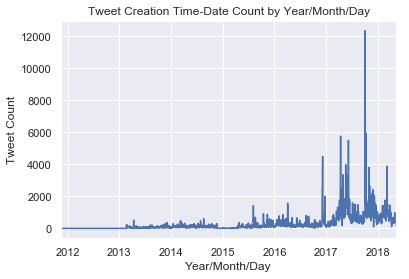

DEBUG:root:The time taken to visualize the statistics is 0.023337562878926594 minutes


In [18]:
# Display Tweet count by time-date time series statistics.
tweet_count_by_timedate_time_series(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/created_at-attribute.csv",
    "csv")

<span style="font-family:Papyrus; font-size:1.25em;">

As we can see, more of the Tweets were created relatively recently in 2017 and 2018.  The further we go back in time, the fewer Tweets we have.<br>

</span>

### Re-Tweet Statistics for raw JSON dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

Here, we analyze the number of "True" or "False" values for the "retweeted" attribute for each chunk of the raw JSON file.<br>

</span>

In [27]:
def json_retweeted(json_dataframe, chunk):
    """
    Re-tweet statistics and visualizations for the raw JSON Twitter data chunks.

    :param json_dataframe: the dataframe containing the JSON data chunk.
    :param chunk: the JSON data chunk number.
    :return: None.
    """
    print(f"Re-Tweet Statistics for raw JSON Twitter data chunk {chunk}:")
    print(json_dataframe['retweeted'].value_counts())
    print()

<span style="font-family:Papyrus; font-size:1.25em;">
    
We call the the data analysis function for each chunk of data until we have accounted for the entire raw JSON Twitter dataset.<br>
    
</span>

In [28]:
call_data_analysis_function_on_json_file_chunks(
    "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json", json_retweeted)

Re-Tweet Statistics for raw JSON Twitter data chunk 1:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 2:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 3:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 4:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 5:
False    100000
Name: retweeted, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 6:
False    100000
Name: retweeted, dtype: int64



INFO:root:The time taken to read in the JSON file by Chunks is 5.142159159978231 minutes
INFO:root:The number of chunks is 7 based on chunk size of 100000
INFO:root:



Re-Tweet Statistics for raw JSON Twitter data chunk 7:
False    70423
Name: retweeted, dtype: int64



<span style="font-family:Papyrus; font-size:1.25em;">

It appears that none of our Tweets have been retweeted.  We find this rather odd for a dataset of 650k+ Tweets.  We may need to look further into what exactly the "retweeted" attribute is referencing.<br>

</span>

### Favorited Statistics for raw JSON dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

Here, we analyze the number of "True" or "False" values for the "favorited" attribute for each chunk of the raw JSON file.<br>

</span>

In [30]:
def json_favorited(json_dataframe, chunk):
    """
    Re-tweet statistics and visualizations for the raw JSON Twitter data chunks.

    :param json_dataframe: the dataframe containing the JSON data chunk.
    :param chunk: the JSON data chunk number.
    :return: None.
    """
    print(f"Re-Tweet Statistics for raw JSON Twitter data chunk {chunk}:")
    print(json_dataframe['favorited'].value_counts())
    print()

<span style="font-family:Papyrus; font-size:1.25em;">

We call the the data analysis function for each chunk of data until we have accounted for the entire raw JSON Twitter dataset.<br>

</span>

In [31]:
call_data_analysis_function_on_json_file_chunks(
    "D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json", json_favorited)

Re-Tweet Statistics for raw JSON Twitter data chunk 1:
False    100000
Name: favorited, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 2:
False    100000
Name: favorited, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 3:
False    100000
Name: favorited, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 4:
False    100000
Name: favorited, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 5:
False    100000
Name: favorited, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 6:
False    100000
Name: favorited, dtype: int64

Re-Tweet Statistics for raw JSON Twitter data chunk 7:
False    70423
Name: favorited, dtype: int64



INFO:root:The time taken to read in the JSON file by Chunks is 5.228271007537842 minutes
INFO:root:The number of chunks is 7 based on chunk size of 100000
INFO:root:



<span style="font-family:Papyrus; font-size:1.25em;">

It appears that none of our Tweets have been favorited.  We find this rather odd for a dataset of 650k+ Tweets.  We may need to look further into what exactly the "favorited" attribute is referencing.  From our tables above, the "Favorited" field represents "Indicates whether this Tweet has been liked by the authenticating user".<br>

</span>

### Re-Tweet Statistics for CSV dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

Here, we analyze the number of "True" or "False" values for the "retweeted" attribute for each chunk of the preprocessed CV file.<br>

</span>

In [25]:
def csv_retweeted():
    """
    Re-tweet statistics and visualizations for the CSV Twitter preprocessed dataset.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    print("Re-Tweet Statistics for entire CSV dataset:")
    print(csv_dataframe['retweeted'].value_counts())
    print()

    print("Re-Tweet Statistics for CSV dataset by Company:")
    print("Number of Tweets that are or aren't re-tweets by associated company: ")
    print(csv_dataframe.groupby(['company', 'retweeted']).size())
    print()

    # Graph the Re-Tweet Statistics.
    print("Proportion of Re-Tweets versus non Re-Tweets by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(csv_dataframe[['retweeted', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1))
    grid.map_dataframe(bar_plot, 'retweeted').set_titles('{col_name}')
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">
    
Unlike with the raw JSON format Twitter dataset, we do not need to read the CSV file in chunks and can analyze its contents as a whole.<br>
    
</span>

Re-Tweet Statistics for entire CSV dataset:
True     441619
False    217363
Name: retweeted, dtype: int64

Re-Tweet Statistics for CSV dataset by Company:
Number of Tweets that are or aren't re-tweets by associated company: 
company     retweeted
adani       False        106946
            True         321505
bhp         False         40287
            True          29164
cuesta      False            63
            True             27
fortescue   False          7588
            True           4304
iluka       False          2598
            True            517
newmont     False           716
            True            178
oilsearch   False          1547
            True            656
riotinto    False         15680
            True           9898
santos      False         25497
            True          61604
whitehaven  False          6504
            True           8206
woodside    False          9937
            True           5560
dtype: int64

Proportion of Re-Tweets versus non 

<Figure size 432x288 with 0 Axes>

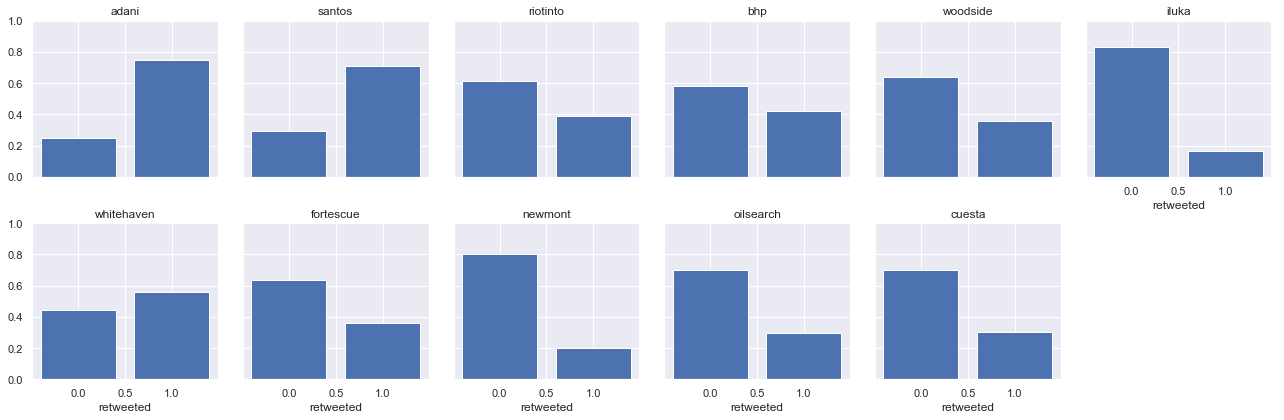

In [26]:
# Call the function.
csv_retweeted()

<span style="font-family:Papyrus; font-size:1.25em;">

The graphs show the proportion of Tweets that are or are not re-tweets by the company the Tweets are associated with.<br>

0.0 = NOT a re-tweet.<br>
1.0 = IS a re-tweet.<br>

</span>

### User Statistics:

<span style="font-family:Papyrus; font-size:1.25em;">

This function provides text-based statistics on the users that account for the most Tweets about a given company.  It also constructs graphs that displays how many of the Tweets for a given company are created by those users in comparison to each other.<br>

</span>

In [31]:
def most_tweets_by_users():
    """
    User related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    # Graph the User Statistics.
    print("Proportion of most Tweets for unique users by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(csv_dataframe[['user_screen_name', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(0, 10))
    grid.map_dataframe(bar_plot_zipf, 'user_screen_name').set_titles('{col_name}').set_xlabels('appearance count')
    plt.show()

    # Adjusted parameters to allow statistics for all companies to show in output.
    pd.set_option("display.precision", 12)
    pd.options.display.max_rows = 100

    print("User Statistics for CSV dataset by Company: ")
    print("Top Tweet counts for unique user by associated company.")
    print(
        csv_dataframe[['company', 'user_screen_name']].groupby('company')
            .apply(lambda x: x['user_screen_name'].value_counts(normalize=True).head())
        # .value_counts(normalize=True)\
        # .sort_index(ascending=False).head())
    )
    print()

<span style="font-family:Papyrus; font-size:1.25em;">

We cannot currently perform this analysis on the raw JSON Tweet file as it has not been auto-encoded or hand-labeled to be associated with a SLO mining company.  Thus, we are restricted to analyzing the preprocessed CSV dataset that does possess this information.<br>

</span>

Proportion of most Tweets for unique users by associated company: 


<Figure size 432x288 with 0 Axes>

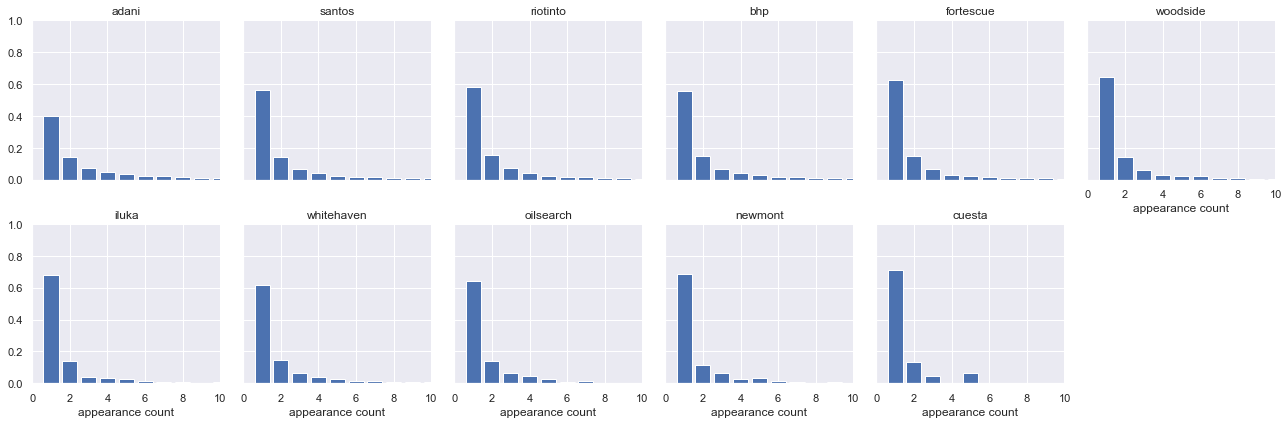

User Statistics for CSV dataset by Company: 
Top Tweet counts for unique user by associated company.
company                    
adani       WgarNews           0.015194269590
            GalileeBlockade    0.008992860327
            MarkPlackett1      0.007520113152
            SeanBradbery       0.007069653239
            garland_paige      0.006686879013
bhp         CommSec            0.026205526198
            aus_business       0.014744208147
            FinancialReview    0.013750701934
            icharttop          0.011720493585
            3novicesSydney     0.009186332810
cuesta      ABN_Newswire       0.144444444444
            proactive_au       0.133333333333
            MktTrader          0.055555555556
            ShareScene         0.055555555556
            sharecafetweets    0.055555555556
fortescue   FortescueNews      0.049781365624
            aus_business       0.016986209216
            FinancialReview    0.014547595022
            TweetingRoo        0.0123612512

In [32]:
# Call the function.
most_tweets_by_users()

<span style="font-family:Papyrus; font-size:1.25em;">

The text output displays the top 5 unique users that account for the largest proportion of Tweets that are associated with a given company.<br>

The graph output shows that there are a few users that account for the majority of Tweets about a given company.<br>

</span>

### Character Count Statistics:

<span style="font-family:Papyrus; font-size:1.25em;">

This function provides character counts for all the Tweets associated with a given company.<br>

</span>

In [33]:
def character_counts():
    """
    Character related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    def relhist_proc(col, **kwargs):
        """
        Helper function to visualize the data.

        :param col: the columns of the graph.
        :param kwargs: variable number of arguments.
        :return: None.
        """
        ax = plt.gca()
        data = kwargs.pop('data')
        proc = kwargs.pop('proc')
        processed = proc(data[col])
        # relative frequency histgram
        # https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram
        ax.hist(processed, weights=np.ones_like(processed) / processed.size, **kwargs)

    def char_len(tweets):
        """
        Determine the length of the Tweet text.

        :param tweets: the Tweet text.
        :return: the length of the Tweet.
        """
        return tweets.str.len()

    print("Character Statistics for CSV dataset by Company: ")
    print("Character count relative frequency histogram: ")
    plt.figure()
    grid = sns.FacetGrid(csv_dataframe[['text', 'company']], col='company', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(relhist_proc, 'text', bins=10, proc=char_len).set_titles('{col_name}')
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

We cannot currently perform this analysis on the raw JSON Tweet file as it has not been auto-encoded or hand-labeled to be associated with a SLO mining company.  Thus, we are restricted to analyzing the preprocessed CSV dataset that does possess this information.<br>

</span>

Character Statistics for CSV dataset by Company: 
Character count relative frequency histogram: 


<Figure size 432x288 with 0 Axes>

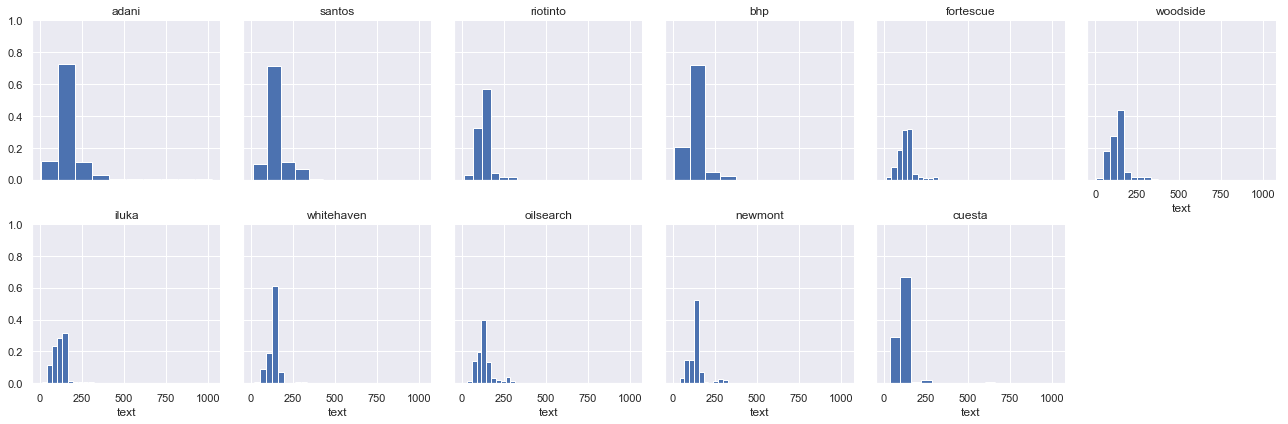

In [34]:
# Call the function.
character_counts()

<span style="font-family:Papyrus; font-size:1.25em;">

The graph outputs appear to show that most Tweets for any given company are relatively long in length.<br>

**FIXME - is this the correct interpretation?**<br>

</span>

## Resources Used:

<span style="font-family:Papyrus; font-size:1.25em;">

**TODO: convert to annotated bibliography**

Dataset Files (obtained from Borg supercomputer):<br>

dataset_slo_20100101-20180510.json<br>
dataset_20100101-20180510.csv<br>

Note: These are large fiels not included in the project GitHub Repository.<br>


- [SLO-analysis.ipynb](SLO-analysis.ipynb)<br>
    -original SLO Twitter data analysis file from Shuntaro Yada.<br>


- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json<br>
    -explanation of all data fields in JSON file format for Tweets.<br>


- https://datatofish.com/export-dataframe-to-csv/<br>
- https://datatofish.com/export-pandas-dataframe-json/<br>
    -saving Pandas dataframe to CSV/JSON<br>
    

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html<br>
    -Pandas to_datetime() function call.<br>
    

- https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/
    -plotting with matplotlib.<br>


</span>

## TODO's:

<span style="font-family:Papyrus; font-size:1.25em;">

Implement further elements from Shuntaro Yada's SLO Twitter Dataset Analysis.<br>

</span>